In [2]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import GaussianNB
import pandas as pd

In [ ]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()
X = data.data[:,:2]
y = data.target

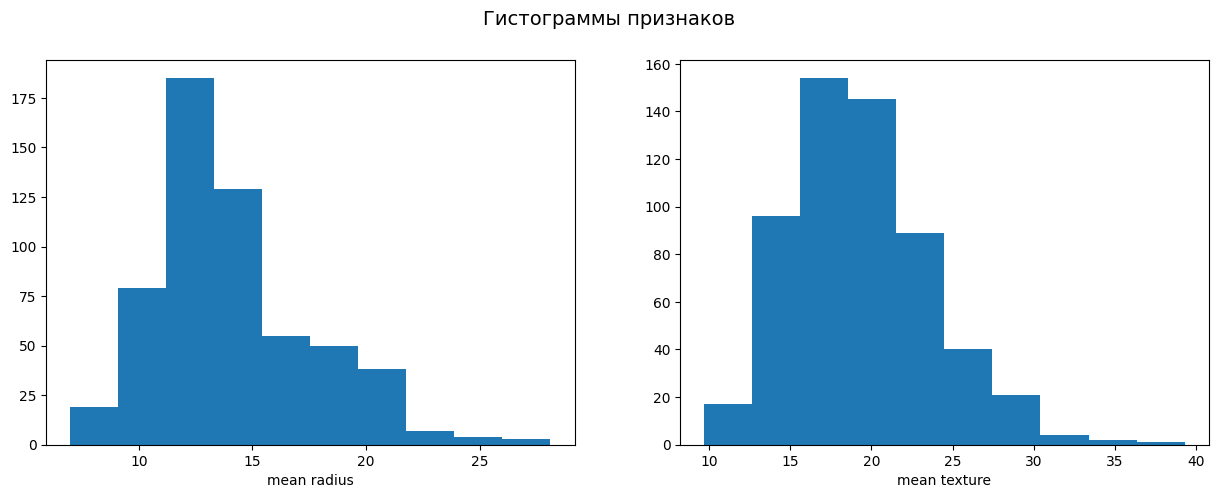

In [ ]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.9127516778523489


# 1 На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.

In [ ]:
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

X = data.data
y = data.target

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

models = [
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('CategoricalNB', CategoricalNB()),
    ('ComplementNB', ComplementNB())
]
for name, model in models:
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'{name}: {accuracy:.4f}')


MultinomialNB: 0.8963
BernoulliNB: 0.6274
CategoricalNB: 0.9596
ComplementNB: 0.8946


Наиболее точная категориальная модель

# 2 Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML3.6%20bayes/titanic.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,0,1
887,888,1,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,1,29.0,1,2,23.4500,0,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0,0


In [ ]:
X = df.iloc[:,:7]
y = df.iloc[:,-3:]


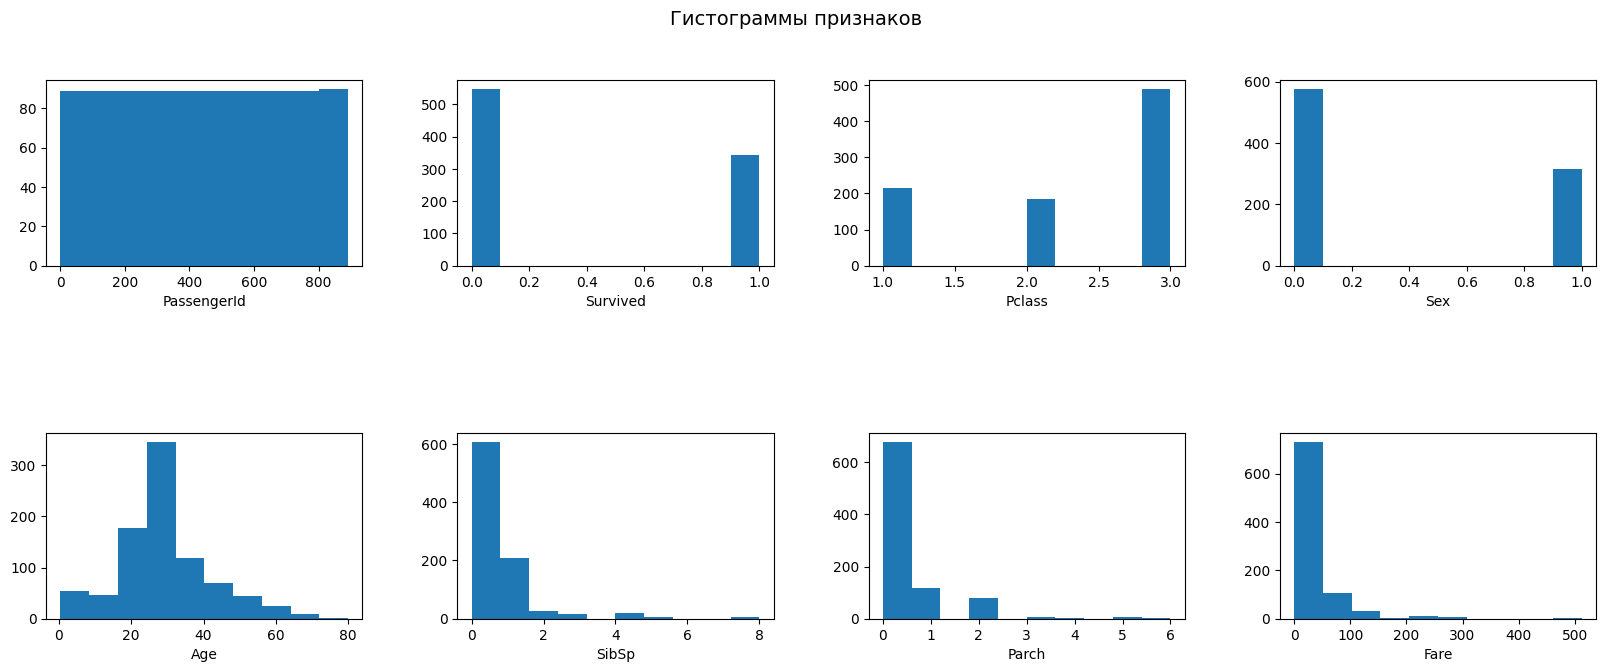

In [ ]:
f = plt.figure(figsize=(20, 7))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.hist(df.iloc[:, i].values)
    plt.xlabel(df.columns[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

In [ ]:
df = df.drop(['PassengerId',	'Survived',	'Pclass',	'Sex'], axis=1)
df.head()

,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1
1,38.0,1,0,71.2833,1,0,0
2,26.0,0,0,7.9250,0,0,1
3,35.0,1,0,53.1000,0,0,1
4,35.0,0,0,8.0500,0,0,1


In [ ]:
y = y.values
x = df.iloc[:,:4].values

In [ ]:
y_target = np.dot(y , np.array([3, 2, 1]))


In [ ]:
models = [
    ('MultinomialNB', MultinomialNB()),
    ('BernoulliNB', BernoulliNB()),
    ('CategoricalNB', CategoricalNB()),
    ('ComplementNB', ComplementNB())
]
for name, model in models:
    model.fit(x, y_target)
    y_pred = model.predict(x)
    accuracy = accuracy_score(y_target, y_pred)
    print(f'{name}: {accuracy:.4f}')

MultinomialNB: 0.3749
BernoulliNB: 0.7250
CategoricalNB: 0.7834
ComplementNB: 0.6251


# 3 Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.

In [18]:
import pandas as pd

df = pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
data = df.drop(['Name', 'Cabin', 'Ticket', 'PassengerId', 'Sex', 'Embarked'], axis=1).dropna()

In [20]:
data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,34.5,0,0,7.8292
1,1,3,47.0,1,0,7.0000
2,0,2,62.0,0,0,9.6875
3,0,3,27.0,0,0,8.6625
4,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...
409,1,3,3.0,1,1,13.7750
411,1,1,37.0,1,0,90.0000
412,1,3,28.0,0,0,7.7750
414,1,1,39.0,0,0,108.9000


In [27]:
x = data.iloc[:, 1:]
y = data.iloc[:, 1].values

In [33]:
gnb = GaussianNB().fit(x, y)

y_pred = gnb.predict(x)
accuracy = accuracy_score(y, y_pred)
print(f'accuracy : {accuracy:.4f}')

accuracy : 1.0000
